In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
import matplotlib.pyplot as plt

# Reset plt functions
plt.title = lambda title: plt.gca().set_title(title)
plt.xlabel = lambda label: plt.gca().set_xlabel(label)
plt.ylabel = lambda label: plt.gca().set_ylabel(label)


In [3]:
# 🔹 Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Bala@2006",
    database="datas"
)
cursor = conn.cursor()

# Execute Query
cursor.execute("SELECT * FROM sales_data;")
data = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Close connection
cursor.close()
conn.close()


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)
df.dtypes

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month               float64
Sales               float64
City                 object
Hour                float64
dtype: object

In [5]:
null_data=df.isnull().sum()
null_data

Order_ID            13016
Product                 0
Quantity_Ordered    12545
Price_Each          12573
Order_Date              0
Purchase_Address        0
Month               12571
Sales               12537
City                    0
Hour                12582
dtype: int64

In [6]:
# cleaning null datas Quantity_Ordered
n_Quantity_Ordered=SimpleImputer(strategy='mean')
n_Quantity_Ordered.fit(df[['Quantity_Ordered']])
df[['Quantity_Ordered']]=n_Quantity_Ordered.transform(df[['Quantity_Ordered']])

# Price_Each
n_Price_Each=SimpleImputer(strategy='mean')
n_Price_Each.fit(df[['Price_Each']])
df[['Price_Each']]=n_Price_Each.transform(df[['Price_Each']])

# Month 
n_Month=SimpleImputer(strategy='median')
n_Month.fit(df[['Month']])
df[['Month']]=n_Month.transform(df[['Month']])

# Sales
n_Sales=SimpleImputer(strategy='mean')
n_Sales.fit(df[['Sales']])
df[['Sales']]=n_Sales.transform(df[['Sales']])

n_Hour=SimpleImputer(strategy='mean')
n_Hour.fit(df[['Hour']])
df[['Hour']]=n_Hour.transform(df[['Hour']])

n_Order_ID =SimpleImputer(strategy='most_frequent')
n_Order_ID.fit(df[['Order_ID']])
df[['Order_ID']]=n_Order_ID .transform(df[['Order_ID']])

In [7]:
df.dtypes

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month               float64
Sales               float64
City                 object
Hour                float64
dtype: object

In [8]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y %H:%M')
df['Month']=df['Month'].astype(int)
df['Quantity_Ordered']=df['Quantity_Ordered'].astype(int)

In [9]:
unique_products=df['Product'].unique()
unique_City =df['City'].unique()
unique_City 

array([' New York City', ' San Francisco', ' Atlanta', ' Portland',
       ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle'],
      dtype=object)

In [10]:
dup=df.duplicated()
df[dup]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
438,296081.0,Flatscreen TV,1,300.000,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.000,Austin,16.0
1048,296668.0,AAA Batteries (4-pack),1,184.375,2019-12-20 16:07:00,"535 7th St, San Francisco, CA 94016",12,185.192,San Francisco,16.0
1727,297311.0,Bose SoundSport Headphones,1,99.990,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.990,Los Angeles,7.0
2812,298358.0,Apple Airpods Headphones,1,150.000,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.000,San Francisco,15.0
3119,298657.0,Lightning Charging Cable,1,14.950,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.950,Atlanta,18.0
...,...,...,...,...,...,...,...,...,...,...
173469,210950.0,Apple Airpods Headphones,1,150.000,2019-06-22 20:00:00,"479 Hickory St, New York City, NY 10001",6,150.000,New York City,20.0
179084,216321.0,USB-C Charging Cable,1,11.950,2019-06-19 16:11:00,"586 Wilson St, Seattle, WA 98101",6,11.950,Seattle,16.0
180006,217210.0,Apple Airpods Headphones,1,150.000,2019-06-11 15:31:00,"258 10th St, Boston, MA 02215",6,150.000,Boston,15.0
181613,218756.0,AAA Batteries (4-pack),1,2.990,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.990,Boston,14.0


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(185825, 10)

In [13]:
sort_price=df.sort_values(by='Sales' , ascending=False)
# sort_price.head()

In [14]:
count_products=df['Product'].value_counts()
count_products

Product
USB-C Charging Cable          21881
Lightning Charging Cable      21634
AAA Batteries (4-pack)        20625
AA Batteries (4-pack)         20567
Wired Headphones              18866
Apple Airpods Headphones      15539
Bose SoundSport Headphones    13315
27in FHD Monitor               7503
iPhone                         6841
27in 4K Gaming Monitor         6226
34in Ultrawide Monitor         6179
Google Phone                   5524
Flatscreen TV                  4798
Macbook Pro Laptop             4724
ThinkPad Laptop                4127
20in Monitor                   4099
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [15]:
df.describe()

,Order_ID,Quantity_Ordered,Price_Each,Order_Date,Month,Sales,Hour
count,185825.000000,185825.000000,185825.000000,185825,185825.000000,185825.000000,185825.000000
mean,225508.997896,1.115975,184.015693,2019-07-18 21:30:26.610520576,7.054756,184.842395,14.415910
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000
25%,175746.000000,1.000000,11.950000,2019-04-16 20:54:00,4.000000,11.950000,11.000000
50%,223623.000000,1.000000,14.950000,2019-07-17 20:11:00,7.000000,23.900000,14.416271
75%,271574.000000,1.000000,183.940957,2019-10-26 07:54:00,10.000000,184.768912,19.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000
std,52719.305472,0.428789,320.430012,NaN,3.376902,320.196728,5.230165


In [16]:
group_products = df.groupby('Product')['Sales'].mean()
group_products = group_products.sort_values(ascending=False).head(10)  #top 10
group_products

Product
Macbook Pro Laptop        1585.379183
ThinkPad Laptop            937.013045
iPhone                     659.333032
LG Washing Machine         576.308136
LG Dryer                   570.433771
Google Phone               568.332866
Vareebadd Phone            381.879713
27in 4K Gaming Monitor     375.230844
34in Ultrawide Monitor     367.832758
Flatscreen TV              293.640613
Name: Sales, dtype: float64

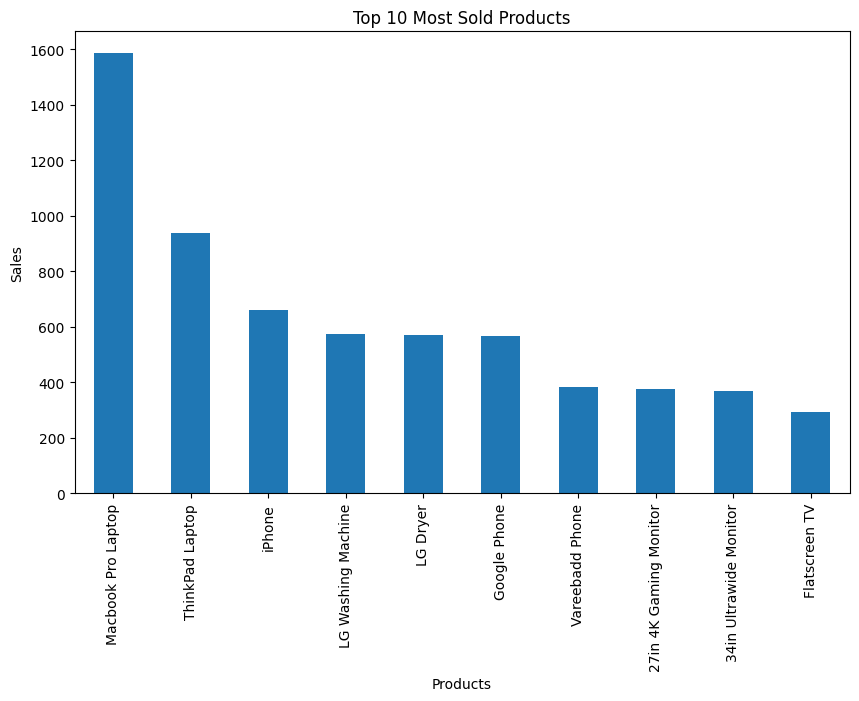

In [17]:
plt.figure(figsize=(10,6))
group_products.plot(kind='bar')
plt.title("Top 10 Most Sold Products")
plt.ylabel("Sales")
plt.xlabel("Products")
plt.show()

In [18]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
1     1.673910e+06
2     2.030401e+06
3     2.621301e+06
4     3.152746e+06
5     2.894818e+06
6     2.402206e+06
7     4.882293e+06
8     2.070512e+06
9     1.965666e+06
10    3.475667e+06
11    2.958188e+06
12    4.220629e+06
Name: Sales, dtype: float64


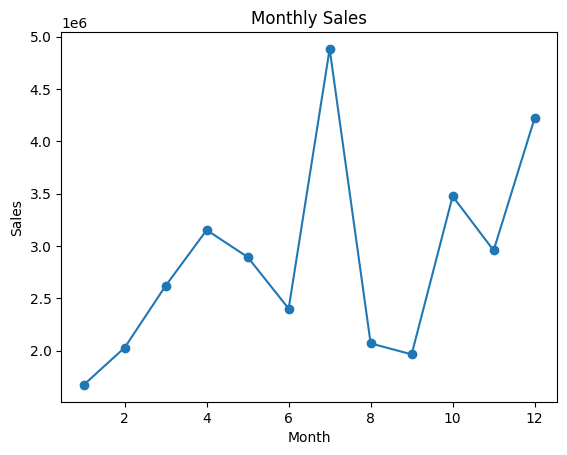

In [19]:
monthly_sales.plot(kind='line', marker='o')

plt.title("Monthly Sales")  # ✅ Correct function call
plt.xlabel("Month")  # ✅ Correct function call
plt.ylabel("Sales")
plt.show()

In [20]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
print(city_sales)

City
San Francisco    8.238392e+06
Los Angeles      5.430209e+06
New York City    4.626575e+06
Boston           3.644841e+06
Dallas           2.767906e+06
Name: Sales, dtype: float64


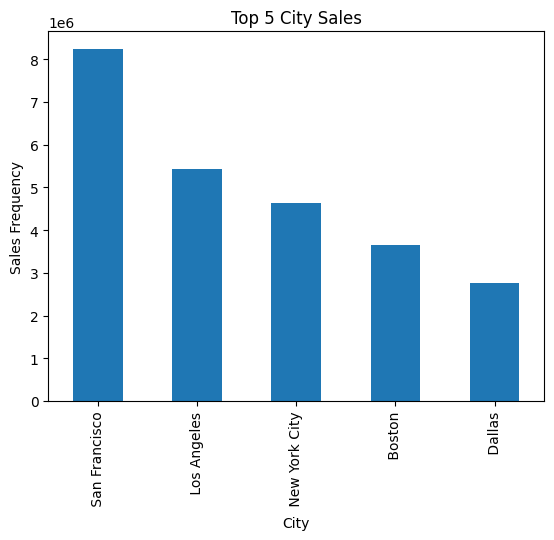

In [21]:
city_sales.plot(kind='bar')
plt.title("Top 5 City Sales")
plt.ylabel('Sales Frequency')
plt.xlabel('City')
plt.show()

In [22]:
# Group by 'City' and 'Product', summing the 'Quantity_Ordered'
city_product_sales = df.groupby(['City', 'Product'])['Quantity_Ordered'].sum()
# print(city_product_sales)
# Find the product with the highest sales in each city
top_selling_products = city_product_sales.groupby('City').idxmax()

# Display result
# print(top_selling_products)


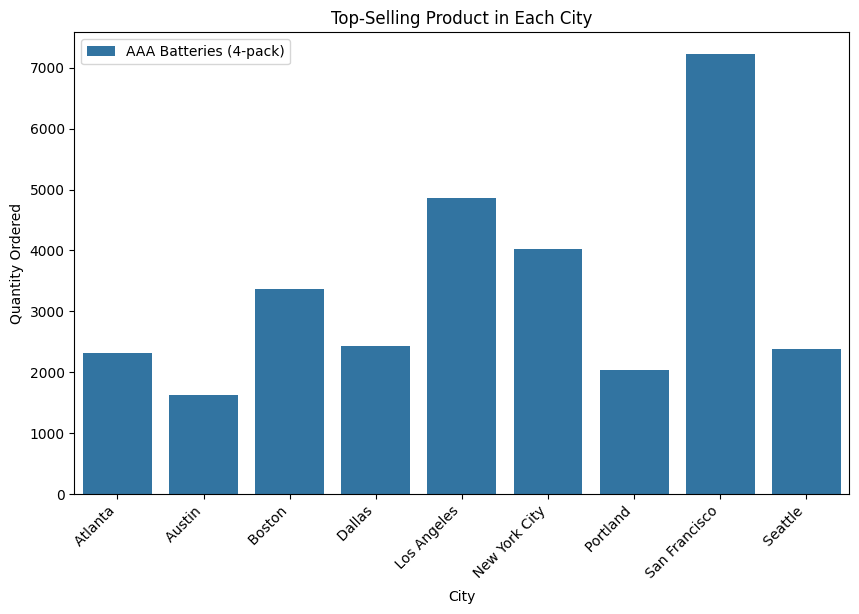

In [23]:
# Extract City and Product separately for plotting
city_names = [city for city, product in top_selling_products]
product_names = [product[1] for product in top_selling_products]
plt.figure(figsize=(10,6))
sns.barplot(x=city_names, y=city_product_sales.groupby('City').max().values, hue=product_names)

plt.title("Top-Selling Product in Each City")
plt.xlabel("City")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=45, ha='right')
plt.show()


In [24]:
# Extract Year-Month from 'Order_Date'
df['Year-Month'] = df['Order_Date'].dt.to_period('M')

# Group by Year-Month and sum Sales
monthly_sales = df.groupby('Year-Month')['Sales'].sum()

# Get the top 3 months with highest sales
top_3_months = monthly_sales.sort_values(ascending=False).head(3)

# Display result
print(top_3_months)


Year-Month
2019-12    4.532382e+06
2019-10    3.736905e+06
2019-04    3.374176e+06
Freq: M, Name: Sales, dtype: float64


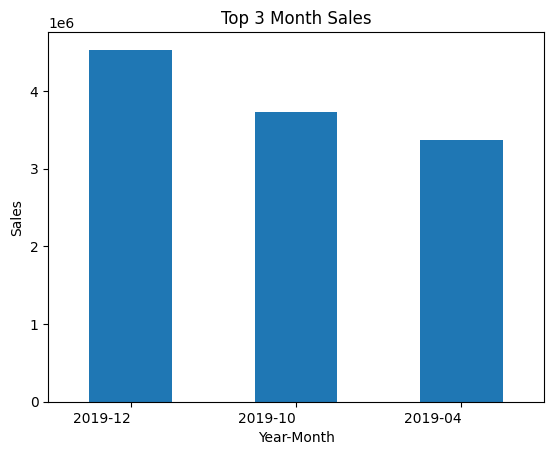

In [25]:
top_3_months.plot(kind='bar')
plt.title("Top 3 Month Sales")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.xticks(rotation=360, ha='right')
plt.show()

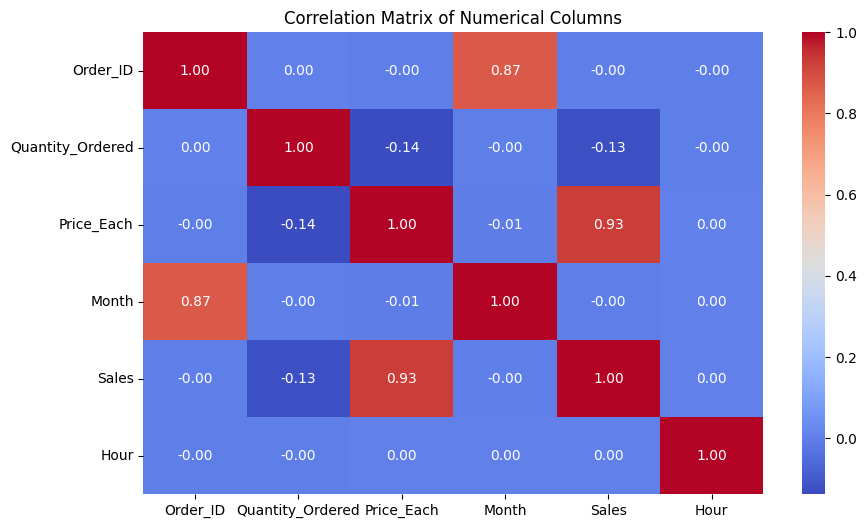

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()
